## Exercise 13

Implement k-means soft clustering with online update, adopting the Euclidean distance as dissimilarity metric. Given the dataset data3.csv, apply the algorithm using $k = 3$ and $\eta = 0.1$ until the algorithm converges. As initial centroids use $x_{32}, x_{33}, x_{123}$, where the subscripts define the indexes of the points in the dataset. After convergence of the algorithm, compute the membership of $x_{10}$ with respect to each centroid and also plot the dataset using different colors for $x_{10}, x_{32}, x_{33}, x_{123}$.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
frame = pd.read_csv("data3.csv")

In [6]:
def plot(frame):
    x = frame.iloc[0]
    y = frame.iloc[1]
    z = frame.iloc[:,-1]
    z_min, z_max = np.abs(z).min(), np.abs(z).max()
    
    plt.scatter(x,y,z)
    
    plt.show()

In [7]:
def norm_cal(x,y):
    return math.sqrt(x**2 + y**2)

In [8]:
np.random.seed(1)
k = 3

In [9]:
def eul_distance(x, y):
    res = math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2) 
    return res

In [26]:
def error(centroids, tmpcentroids, epsilon):
    tot = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        tmpcentroid = tmpcentroids[i]
        tot += np.abs(centroid[0] - tmpcentroid[0])
        tot += np.abs(centroid[1] - tmpcentroid[1])
    if tot < epsilon:
        print(tot)
        return False
    else:
        return True

In [1]:
def k_means(k, df, neo, epsilon):
    x = df["x"]
    y = df["y"]
    membership = [0]*len(df)
    newlist = list(zip(x,y,membership))
    frame = pd.DataFrame(data = newlist, columns=['x', 'y', 'membership'])

    #init centroid
    centroids = []
    centroids.append(frame.iloc[32])
    centroids.append(frame.iloc[33])
    centroids.append(frame.iloc[123])
    print(centroids)
    
    iteration = 10
    while iteration:
        # fuzzy membership for every centroid
        tmpcentroids = centroids
        for i in range(k):
            centroid = centroids[i]
            centroid = [centroid[0], centroid[1]]
            tot = 0
            delta = 0

            # find tot
            for elem in range(len(frame)):
                point = frame.iloc[elem]
                point = [point[0], point[1]]
                distance = eul_distance(centroid, point)
                tot += math.pow(math.e, (-distance))

            # find membership
            for elem in range(len(frame)):
                point = frame.iloc[elem]
                point = [point[0], point[1]]
                distance = eul_distance(centroid, point)
                num = math.pow(math.e, (-distance))
                membership = num / tot
                frame.iloc[elem,-1] = membership 

                delta += neo * membership * ((point[0]-centroid[0]) + (point[1]-centroid[1]))

            centroids[i] += delta
            plot(frame, centroid)
        print(centroids)  
        # da sistemare
        iteration -=1
        
        tmpcentroids = centroids

[x             31.613582
y             81.075340
membership     0.000000
Name: 32, dtype: float64, x             31.641961
y             77.366509
membership     0.000000
Name: 33, dtype: float64, x             52.138753
y             71.024211
membership     0.000000
Name: 123, dtype: float64]


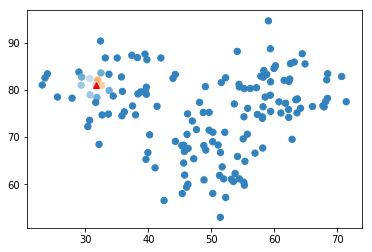

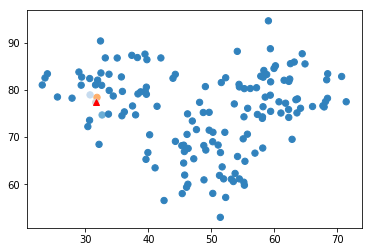

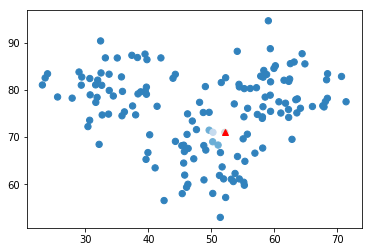

[x             31.637748
y             81.099507
membership     0.024167
Name: 32, dtype: float64, x             31.698477
y             77.423025
membership     0.056516
Name: 33, dtype: float64, x             52.078687
y             70.964146
membership    -0.060066
Name: 123, dtype: float64]


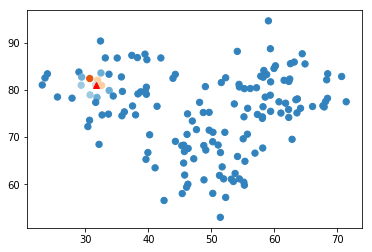

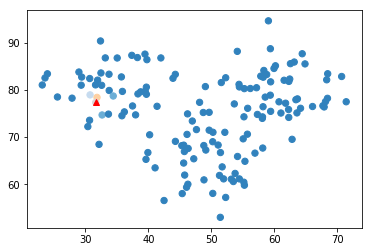

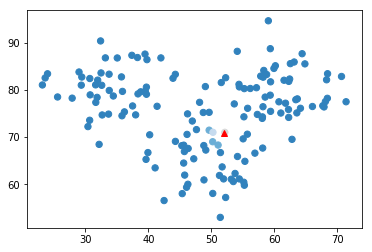

[x             31.659793
y             81.121552
membership     0.046211
Name: 32, dtype: float64, x             31.750737
y             77.475285
membership     0.108776
Name: 33, dtype: float64, x             52.020866
y             70.906325
membership    -0.117887
Name: 123, dtype: float64]


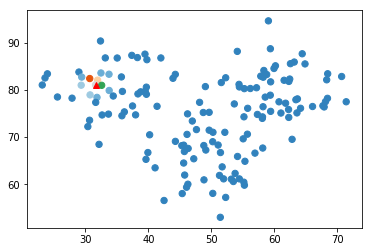

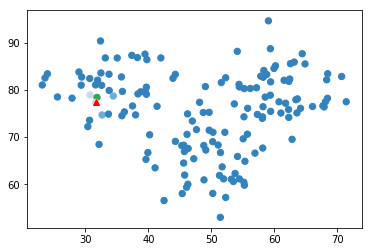

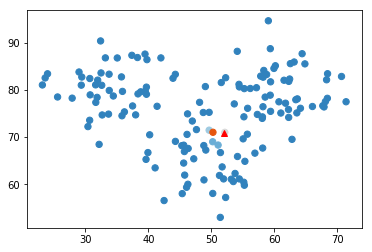

[x             31.679926
y             81.141684
membership     0.066344
Name: 32, dtype: float64, x             31.799315
y             77.523863
membership     0.157354
Name: 33, dtype: float64, x             51.964576
y             70.850035
membership    -0.174177
Name: 123, dtype: float64]


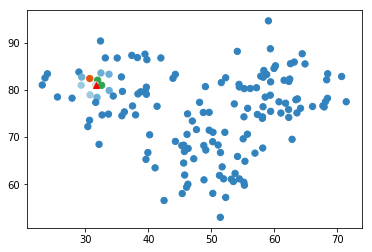

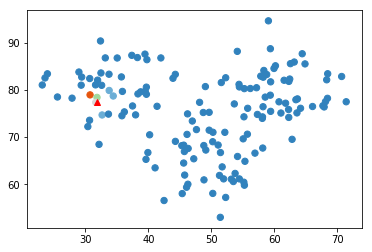

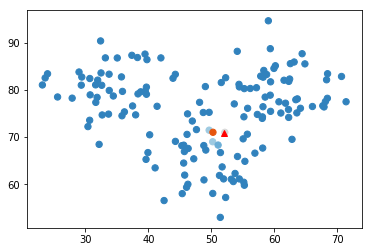

[x             31.698329
y             81.160088
membership     0.084747
Name: 32, dtype: float64, x             31.844656
y             77.569205
membership     0.202696
Name: 33, dtype: float64, x             51.909231
y             70.794690
membership    -0.229522
Name: 123, dtype: float64]


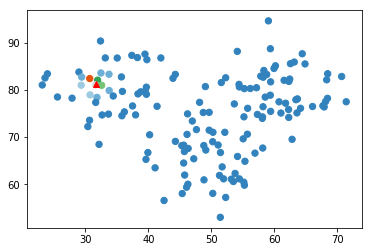

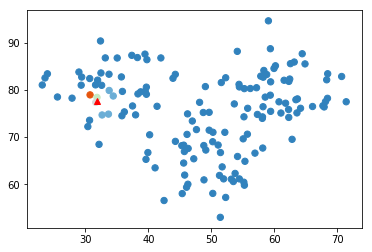

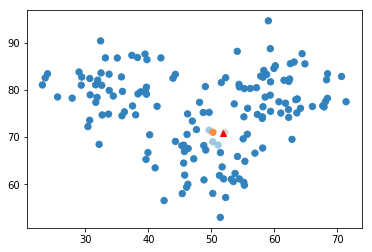

[x             31.715163
y             81.176922
membership     0.101581
Name: 32, dtype: float64, x             31.887114
y             77.611662
membership     0.245153
Name: 33, dtype: float64, x             51.854347
y             70.739805
membership    -0.284406
Name: 123, dtype: float64]


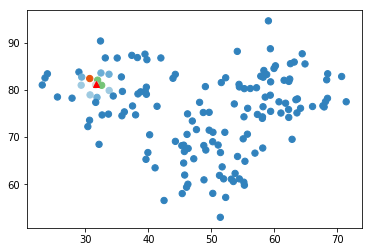

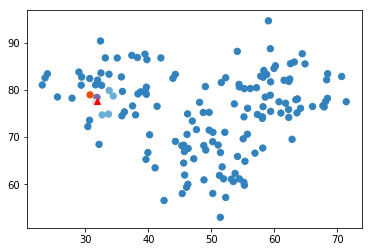

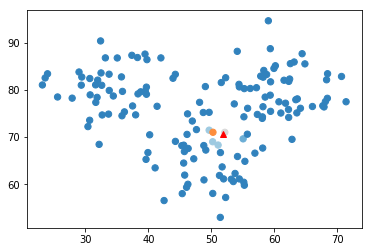

[x             31.730570
y             81.192329
membership     0.116989
Name: 32, dtype: float64, x             31.926970
y             77.651518
membership     0.285009
Name: 33, dtype: float64, x             51.799522
y             70.684980
membership    -0.339231
Name: 123, dtype: float64]


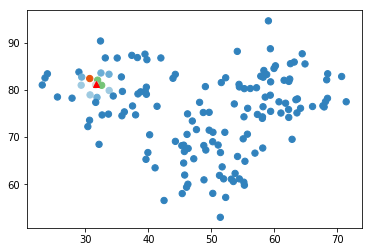

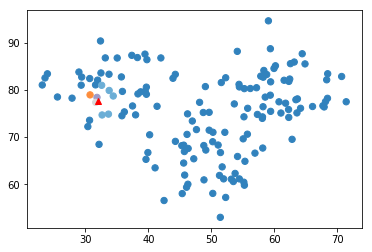

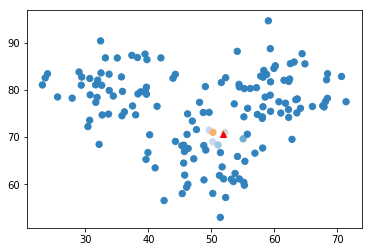

[x             31.744678
y             81.206437
membership     0.131097
Name: 32, dtype: float64, x             31.964455
y             77.689003
membership     0.322494
Name: 33, dtype: float64, x             51.744429
y             70.629888
membership    -0.394324
Name: 123, dtype: float64]


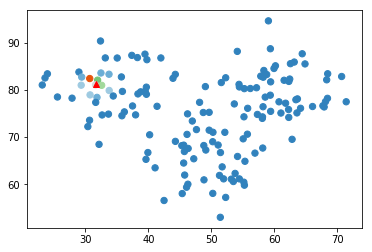

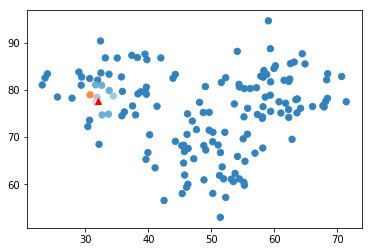

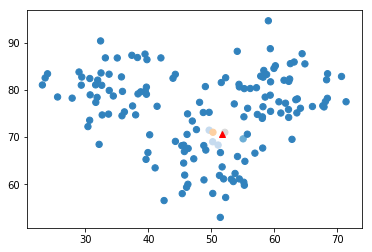

[x             31.757601
y             81.219359
membership     0.144019
Name: 32, dtype: float64, x             31.999764
y             77.724312
membership     0.357803
Name: 33, dtype: float64, x             51.688808
y             70.574267
membership    -0.449945
Name: 123, dtype: float64]


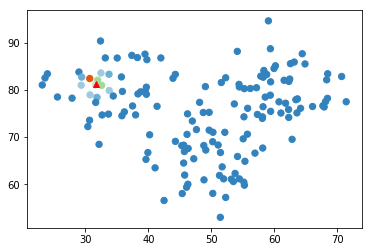

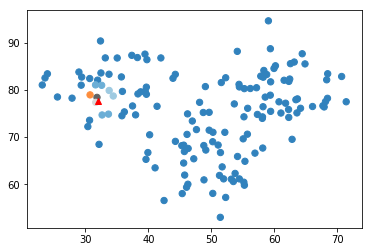

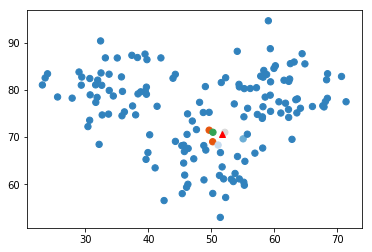

[x             31.769440
y             81.231199
membership     0.155859
Name: 32, dtype: float64, x             32.033062
y             77.757610
membership     0.391101
Name: 33, dtype: float64, x             51.632462
y             70.517921
membership    -0.506291
Name: 123, dtype: float64]


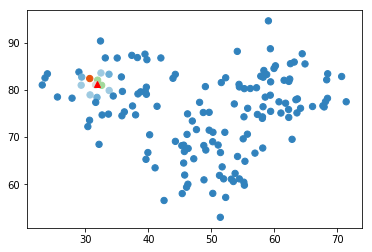

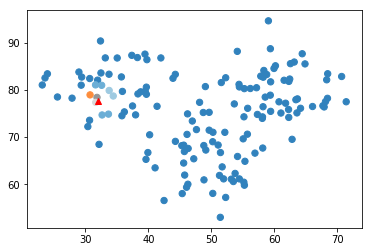

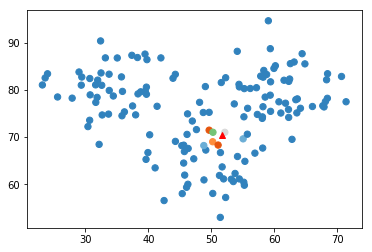

[x             31.780290
y             81.242049
membership     0.166709
Name: 32, dtype: float64, x             32.064499
y             77.789047
membership     0.422538
Name: 33, dtype: float64, x             51.575258
y             70.460716
membership    -0.563495
Name: 123, dtype: float64]


In [33]:
def plot(frame, prototype):
    x = frame.iloc[:,0]
    y = frame.iloc[:, 1]
    z = frame.iloc[:,-1]
    z_min, z_max = np.abs(z).min(), np.abs(z).max()

    plt.plot(prototype[0], prototype[1], '^', c="red")
    plt.scatter(x, y, c=z, s=40, cmap='tab20c')
    plt.show()
    
k_means(3, frame, 0.1, 0.001)